![title](https://i.ibb.co/f2W87Fg/logo2020.png)

---


# Task 5 - Convolution
  
This notebook will ask you to first implement convolution functions from scratch in numpy. Then later try it to perform simple image processing.

In this exercise, you will build every step of the convolution process. 

To understand the steps of Convolutional better, You will first implement **three helper functions**: 
  
    * zero padding
    * slicing, and
    * and the convolution function itself. 


---
---
#[Part 0] Import Libraries 

---
## 1 - Import Libraries

First, install tabulate library for visualization

In [1]:
!pip install tabulate

Import required libraries

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tabulate import tabulate

%matplotlib inline

plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

Write down your Name and Student ID

In [3]:
## --- start your code here ----

NIM = 1301170073
Nama = "Pratama Yoga S"

## --- end your code here ----

---
---
# [Part 1] Zero-Padding

Zero-padding adds zeros around the border of an image:

<p align=center>
<img src="https://image.ibb.co/eYz6dz/PAD.png" width='600'><br>
  <b>Zero-Padding</b> Image (3 channels, RGB) with a padding of 2.
</p>


<br>

The main benefits of padding is tp allows you to use convolution without necessarily shrinking the height and width of the volumes. 



---
#### <font color='red'>**EXERCISE:** </font>

Implement **Padding** function, which pads all the images of a batch of examples X with zeros. 

*Hint*: [Use np.pad](https://docs.scipy.org/doc/numpy/reference/generated/numpy.pad.html). 

<br>

---
<br>

*Hint*: If you want to pad the array **"`a`"** of shape $(5,5,5,5,5)$ with:
* `pad = 1` for the `2nd` dimension, 
* `pad = 3` for the `4th` dimension and 
* `pad = 0` for the rest, 

<br>

you would do:

```python
a = np.pad(a, ((0,0), (1,1), (0,0), (3,3), (0,0)), 'constant', constant_values = 0)
```
    
<br>

In this excercise, X is a 4-dimensional array, and we want to pad the **2nd** and **3rd** dimension



In [4]:
def zero_pad(X, pad):
    """
    Pad with zeros all images of the dataset X. The padding is applied to the height and width of an image, 
    as illustrated in Figure 1.
    
    Argument:
    X -- python numpy array of shape (m, H_n, W_n, C_n) representing a batch of m images
    pad -- integer, amount of padding around each image on vertical and horizontal dimensions
    
    Returns:
    X_pad -- padded image of shape (m, H_n + 2*pad, W_n + 2*pad, C_n)
    """
    
    X_pad = np.pad(X, ((0,0), (pad, pad), (pad, pad), (0,0)), 'constant', constant_values = 0)     # pad x, (0, 0), (pad, pad), (pad, pad), (0, 0)
    
    return X_pad

Check your implementations

First, create new image examples

X_rand.shape = (4, 3, 3, 2)
Original Images


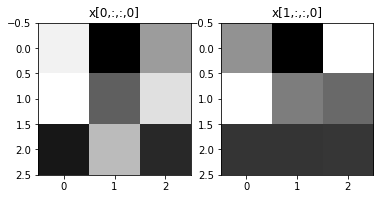

In [5]:
np.random.seed(1)

X_rand = np.random.randn(4, 3, 3, 2)
print ("X_rand.shape =", X_rand.shape)

print('Original Images')
plt.rcParams['figure.figsize'] = (6, 10)
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x[0,:,:,0]')
axarr[0].imshow(X_rand[0,:,:,0])
axarr[1].set_title('x[1,:,:,0]')
axarr[1].imshow(X_rand[1,:,:,0])
plt.show()


Now give pad to images above with padding size=2

X_rand_pad.shape = (4, 7, 7, 2)
X_rand_pad[1,1] =
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]] 

Padded Images


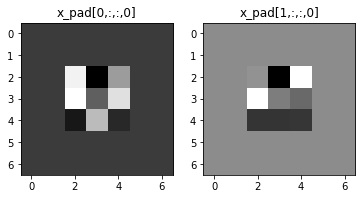

In [6]:
X_rand_pad = zero_pad(X_rand, 2)

print ("X_rand_pad.shape =", X_rand_pad.shape)
print ("X_rand_pad[1,1] =\n", X_rand_pad[1,1].T,'\n')

print('Padded Images')
fig, axarr = plt.subplots(1, 2)
axarr[0].set_title('x_pad[0,:,:,0]')
axarr[0].imshow(X_rand_pad[0,:,:,0])
axarr[1].set_title('x_pad[1,:,:,0]')
axarr[1].imshow(X_rand_pad[1,:,:,0])
plt.show()

**EXPECTED OUTPUT**:
<pre>
X_rand_pad.shape = (4, 7, 7, 2)
X_rand_pad[1,1]  =
 [[0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0.]]
</pre><BR>
  
**EXPECTED IMAGES**:<br>
  ![pad](https://image.ibb.co/kwZSgp/pad.png)

---
---
# [Part 2] Single step of convolution 

In this part, implement **JUST A SINGLE STEP** of matrix multiplication in convolution process, in which you apply the filter to a single position of the input. 

<font color='red'>**WITHOUT THE CONVOLUTION LOOP**</font>

<br>

<center>
<img src="https://image.ibb.co/fv7f49/conv_step.png" width='600'>
</center>

Perform Element-wise product between $input\_slice$ and $W$. 
After that, Sum over all entries of volume $S$ and add bias $b$ to get the result

Later in this notebook, you'll apply this function to multiple positions of the input to implement the full convolution operation. 



---
#### <font color='red'>**EXERCISE:** </font>

    Implement conv_single_step():
    * Perform Element-wise product between input_slice and W. 
    * Sum over all entries of volume S 
    * add bias to get the result

*Hint* : use `np.multiply()` and `np.sum()`


In [9]:
def conv_single_step(input_slice, W, b):
    """
    Apply one filter defined by parameters W on a single slice (input_slice) of the output activation 
    of the previous layer.
    
    Arguments:
    input_slice -- slice of input data of shape (f, f, C_prev)
    W -- Weight parameters contained in a window - matrix of shape (f, f, C_prev)
    b -- Bias parameters contained in a window - matrix of shape (1,)
    
    Returns:
    z -- a scalar value, result of convolving the sliding window (W, b) on a slice x of the input data
    """
    
    # Element-wise product between input_slice and W. You can use np.multiply() 
    S = np.multiply(input_slice, W)
    
    # Sum over all entries of the volume S
    # Then Add bias b. 
    z = np.sum(S) + b
    
    return z

Check your implementations

In [10]:
np.random.seed(1)
X_slice = np.random.randn(4, 4, 3)
W = np.random.randn(4, 4, 3)
b = np.random.randn()

Z = conv_single_step(X_slice, W, b)
print("Z =", Z)

Z = -6.999089450680221


**EXPECTED OUTPUT**:
<pre>
 Z = -6.999089450680221


---
---
#[Part 3] Slicing Array

The `conv_single_step` function above will be used to calculate the output of each slice of image when we convolve the filter.

<center>
<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png" width="700">

<label>image source: [cs230 cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks) </label>
</center>



To make things easier, we build  `get_slice()` function as follow


---
## <font color='red'>**EXERCISE:** </font>

  * implement **get_slice()** function to slice a 3D array 
  * Slicing begin from vertical position **H_start** and horizontal position **W_start**
  * Resulting a **3D array** with height $H$ and width $W$ with the same depth as input


In [18]:
def get_slice(X, H_start, W_start, H, W):
    """
    Slicing X input in shape of f_size from postition H_start and W_start
    Input:
    - X       : Input data of shape (H, W, C)
    - H_start : height (vertical) position to begin the slicing
    - W_start : width (horizontal) position to begin the slicing
    - H       : height slice
    - W       : width slice
    
    Returns:
    - slices : a slice of data of shape (H, W, C)
    """
    slices = X[H_start:H_start+H, W_start:W_start+W]    # x[start:start+??, start:start+??]
    
    return slices

Check your implementations

* with an input of size $5\times5$ and a filter of size $3\times3$, 
* there will be $9$ slices across the space, 
* with each slice should be a $3\times3$ matrix (same size as filter)

<br>

Here we'll get **the first three slices**

In [19]:
np.random.seed(15)
X_int = np.random.randint(0,2,(5,5,1))
print('X_int =')
print('\n'.join(' '.join(str(cell) for cell in row) for row in X_int[:,:,0]))

f_size = 3

# Get 4 slices example from top left,
# then going once to right and down
slices00 = get_slice(X_int, 0, 0, f_size, f_size)

slices01 = get_slice(X_int, 0, 1, f_size, f_size)

slices10 = get_slice(X_int, 1, 0, f_size, f_size)

slices11 = get_slice(X_int, 1, 1, f_size, f_size)


X_int =
0 1 0 1 1
0 0 1 1 1
1 0 1 1 1
1 1 1 0 0
0 1 0 1 1


Run hidden code below to test your implementation

In [20]:
#@title RUN THIS
s = []
s1 = []
s00 = 'h = 0 ,w = 0\nshape ='+str(slices00.shape)+'\n'
s00 += '\n'.join(' '.join(str(cell) for cell in row) for row in slices00[:,:,0])
s00 += '\n-----------------\n'
s1.append(s00)

s01 = 'h = 0 ,w = 1\nshape ='+str(slices01.shape)+'\n'
s01 += '\n'.join(' '.join(str(cell) for cell in row) for row in slices01[:,:,0])
s01 += '\n-----------------\n'
s1.append(s01)
s.append(s1)

s2 = []
s10 = 'h = 1 ,w = 0\nshape ='+str(slices10.shape)+'\n'
s10 += '\n'.join(' '.join(str(cell) for cell in row) for row in slices10[:,:,0])
s10 += '\n-----------------\n'
s2.append(s10)

s11 = 'h = 1 ,w = 1\nshape ='+str(slices11.shape)+'\n'
s11 += '\n'.join(' '.join(str(cell) for cell in row) for row in slices11[:,:,0])
s11 += '\n-----------------\n'
s2.append(s11)
s.append(s2)

print(tabulate(s,tablefmt="pipe"))
  

|:------------------|:------------------|
| h = 0 ,w = 0      | h = 0 ,w = 1      |
| shape =(3, 3, 1)  | shape =(3, 3, 1)  |
| 0 1 0             | 1 0 1             |
| 0 0 1             | 0 1 1             |
| 1 0 1             | 0 1 1             |
| ----------------- | ----------------- |
| h = 1 ,w = 0      | h = 1 ,w = 1      |
| shape =(3, 3, 1)  | shape =(3, 3, 1)  |
| 0 0 1             | 0 1 1             |
| 1 0 1             | 0 1 1             |
| 1 1 1             | 1 1 0             |
| ----------------- | ----------------- |


**EXPECTED OUTPUT**:
<pre>
|:------------------|:------------------|
| h = 0 ,w = 0      | h = 0 ,w = 1      |
| shape =(3, 3, 1)  | shape =(3, 3, 1)  |
| 0 1 0             | 1 0 1             |
| 0 0 1             | 0 1 1             |
| 1 0 1             | 0 1 1             |
| ----------------- | ----------------- |
| h = 1 ,w = 0      | h = 1 ,w = 1      |
| shape =(3, 3, 1)  | shape =(3, 3, 1)  |
| 0 0 1             | 0 1 1             |
| 1 0 1             | 0 1 1             |
| 1 1 1             | 1 1 0             |
| ----------------- | ----------------- |

---
---
#[Part 4] Stride

For a convolution operation, the stride $S$ denotes the number of pixels by which the window moves after each operation. 

Below is the example of slicing with **stride=**$2$
<center>
  <img src='https://stanford.edu/~shervine/teaching/cs-230/illustrations/stride.png' width=600><br>
  <img src='https://stanford.edu/~shervine/teaching/cs-230/illustrations/padding-valid-a.png' width=300> 

<label>image source: [cs230 cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks) </label>
</center>

---

## 1 - Slicing Stride=1
* with an input of size $5\times5$ and a filter of size $3\times3$, 
* if we slice with **stride=**$1$
* there will be $9$ slices across the space, 
* with each slice should be a $3\times3$ matrix (same size as filter)

<br>

Now, to do it automatically to slice all possible location, we can use for loop as follow:

In [21]:
f_size = 3
output_h = 3
output_w = 3

output = []

for h in range(output_h):
    
    w_out = []
    for w in range(output_w):
        
        slices = get_slice(X_int, h, w, f_size, f_size)
        
        s = 'h='+str(h)+', w='+str(w)+'\nshape='+str(slices.shape)+'\n'
        s += '\n'.join(' '.join(str(cell) for cell in row) for row in slices[:,:,0])
        s += '\n----------------'
        w_out.append(s)
        
    output.append(w_out)

    

In [22]:
#@title RUN THIS

s = '\n'.join(' '.join(str(cell) for cell in row) for row in X_int[:,:,0])
print('X_int =')
print(tabulate([[s]],tablefmt="pipe"))
print('\nslices =')
print(tabulate(output,tablefmt="pipe"))

X_int =
|:----------|
| 0 1 0 1 1 |
| 0 0 1 1 1 |
| 1 0 1 1 1 |
| 1 1 1 0 0 |
| 0 1 0 1 1 |

slices =
|:-----------------|:-----------------|:-----------------|
| h=0, w=0         | h=0, w=1         | h=0, w=2         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 0 1 0            | 1 0 1            | 0 1 1            |
| 0 0 1            | 0 1 1            | 1 1 1            |
| 1 0 1            | 0 1 1            | 1 1 1            |
| ---------------- | ---------------- | ---------------- |
| h=1, w=0         | h=1, w=1         | h=1, w=2         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 0 0 1            | 0 1 1            | 1 1 1            |
| 1 0 1            | 0 1 1            | 1 1 1            |
| 1 1 1            | 1 1 0            | 1 0 0            |
| ---------------- | ---------------- | ---------------- |
| h=2, w=0         | h=2, w=1         | h=2, w=2         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 1 0 1      

**EXPECTED OUTPUT**:
<pre>
|:-----------------|:-----------------|:-----------------|
| h=0, w=0         | h=0, w=1         | h=0, w=2         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 0 1 0            | 1 0 1            | 0 1 1            |
| 0 0 1            | 0 1 1            | 1 1 1            |
| 1 0 1            | 0 1 1            | 1 1 1            |
| ---------------- | ---------------- | ---------------- |
| h=1, w=0         | h=1, w=1         | h=1, w=2         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 0 0 1            | 0 1 1            | 1 1 1            |
| 1 0 1            | 0 1 1            | 1 1 1            |
| 1 1 1            | 1 1 0            | 1 0 0            |
| ---------------- | ---------------- | ---------------- |
| h=2, w=0         | h=2, w=1         | h=2, w=2         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 1 0 1            | 0 1 1            | 1 1 1            |
| 1 1 1            | 1 1 0            | 1 0 0            |
| 0 1 0            | 1 0 1            | 0 1 1            |
| ---------------- | ---------------- | ---------------- |

---
##2 - Slicing Stride=2
* with an input of size $5\times5$ and a filter of size $3\times3$, 
* if we slice with **stride=**$2$
* there will be $4$ slices across the space, 
* with each slice should be a $3\times3$ matrix (same size as filter)



---
#### <font color='red'>**EXERCISE:** </font>

  * Look closely at the code to slice input with  **stride=**$1$
  * Modify the code so that the slice can implement  **stride=**$2$


In [44]:
f_size = 3
stride = 2

output_h = 2
output_w = 2

output = []

for h in range(output_h):
    
    w_out = []
    for w in range(output_w):
        
        slices = get_slice(X_int, h*stride, w*stride, f_size, f_size)
        s = 'h='+str(h)+', w='+str(w)+'\nshape='+str(slices.shape)+'\n'
        s += '\n'.join(' '.join(str(cell) for cell in row) for row in slices[:,:,0])
        s += '\n----------------'
        w_out.append(s)
    
    output.append(w_out)


In [45]:
#@title RUN THIS

s = '\n'.join(' '.join(str(cell) for cell in row) for row in X_int[:,:,0])
print('X_int =')
print(tabulate([[s]],tablefmt="pipe"))
print('\nslices =')
print(tabulate(output,tablefmt="pipe"))

X_int =
|:----------|
| 0 1 0 1 1 |
| 0 0 1 1 1 |
| 1 0 1 1 1 |
| 1 1 1 0 0 |
| 0 1 0 1 1 |

slices =
|:-----------------|:-----------------|
| h=0, w=0         | h=0, w=1         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 0 1 0            | 0 1 1            |
| 0 0 1            | 1 1 1            |
| 1 0 1            | 1 1 1            |
| ---------------- | ---------------- |
| h=1, w=0         | h=1, w=1         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 1 0 1            | 1 1 1            |
| 1 1 1            | 1 0 0            |
| 0 1 0            | 0 1 1            |
| ---------------- | ---------------- |


**EXPECTED OUTPUT**:
<pre>
|:-----------------|:-----------------|
| h=0, w=0         | h=0, w=1         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 0 1 0            | 0 1 1            |
| 0 0 1            | 1 1 1            |
| 1 0 1            | 1 1 1            |
| ---------------- | ---------------- |
| h=1, w=0         | h=1, w=1         |
| shape=(3, 3, 1)  | shape=(3, 3, 1)  |
| 1 0 1            | 1 1 1            |
| 1 1 1            | 1 0 0            |
| 0 1 0            | 0 1 1            |
| ---------------- | ---------------- |

---
#[Part 5] Convolution Function


In the forward pass, you will 
* take many filters and convolve them on the input. 
* each '**convolution**' gives a 2D matrix output. 
*  then stack these outputs to get a 3D volume.

<center>
<img src="https://stanford.edu/~shervine/teaching/cs-230/illustrations/convolution-layer-a.png" width="700">

<label>image source: [cs230 cheatsheet](https://stanford.edu/~shervine/teaching/cs-230/cheatsheet-convolutional-neural-networks) </label>
</center>


<br>


---
#### <font color='red'>**EXERCISE:** </font>

**Implement the forward pass** for the convolution layer in the function `conv2d`. 

<br>

Note: 
<pre>You don't have to worry too much about efficiency at this point; 
just write the code in whatever way you find most clear.



In [47]:
def conv2d(X, W, b, S, P):
    """
    A naive implementation of the forward pass for a convolutional layer.

    The input consists of N data points, each with height H_in, width W_in and C channels. 
    
    We convolve each input with F different filters, where each filter
    spans all C channels and has height H_f and width W_f.

    Input:
    - X: Input data of shape (N, H_in, W_in, C)
    - W: Filter weights of shape (F, H_f, W_f, C)
    - b: Biases, of shape (F,)
    - S: Stride, The number of pixels between adjacent receptive fields in the
         horizontal and vertical directions.
    - P: Padding, The number of pixels that will be used to zero-pad the input. 
        
    During padding, 'pad' zeros should be placed symmetrically (i.e equally on both sides)
    along the height and width axes of the input. Be careful not to modfiy the original
    input x directly.

    Returns a tuple of:
    - out: Output data, of shape (N, H_out, W_out, C_out) where H_out and W_out are given by
      H_out = 1 + (H_in + 2 * pad - H_f) / stride
      W_out = 1 + (W_in + 2 * pad - W_f) / stride
      C_out = number of filter (F)
    """
    out = None
    
    N, H_in, W_in, C = X.shape
    F, H_f, W_f, _   = W.shape

    # output (activation) size after convolution
    H_out = 1 + (H_in + 2 * P - H_f) // S
    W_out = 1 + (W_in + 2 * P - W_f) // S
    C_out = F
    
    # initialize output matrix
    out = np.zeros((N, H_out, W_out, C_out))

    # add P zero padding to input X 
    # by calling zero_pad() function with input X, P
    X_pad = zero_pad(X, P)

    # Convolution Forward Pass
    # loop for all data 
    for i in range(N):
        
        # get the i-th example from padded X_pad
        X_i = X_pad[i,:,:,:]

        # loop for all filter
        for f in range(F):            

            # loop in output height
            for h in range(H_out):

                #loop in output width
                for w in range(W_out):                
        
                    # get slice of X_i by calling get_slice() function
                    # with input X_i, h*S, w*S, H_f, and W_f
                    X_slice = get_slice(X_i, h*S, w*S, H_f, W_f)
                    
                    # calculate the convolution output by calling conv_single_step() function
                    # with input X_slice, W[f], and b[f]
                    out[i, h, w, f] = conv_single_step(X_slice, W[f], b[f])
                                        
    # Making sure your output shape is correct
    assert(out.shape == (N, H_out, W_out, C_out))
        
    return out


Check your implementations

In [48]:
np.random.seed(1)
X_rand = np.random.randn(10,4,4,3)
W = np.random.randn(8,2,2,3)
b = np.random.randn(8,)
S = 1
P = 2

Z = conv2d(X_rand, W, b, S, P)
print("Z's mean =", np.mean(Z))

Z's mean = 0.03749357578367075


**EXPECTED OUTPUT**:
<pre>
Z's mean = 0.03749357578367075

In [49]:
np.random.seed(1)
X_rand = np.random.randn(10,4,4,3)
W = np.random.randn(8,2,2,3)
b = np.random.randn(8,)
S = 2
P = 3


Z = conv2d(X_rand, W, b, S, P)
print("Z's mean =", np.mean(Z))

Z's mean = 0.003582574977755886


**EXPECTED OUTPUT**:
<pre>
Z's mean = 0.003582574977755886

---
#[Part 6] Image Processing via Convolutions

Now to check your implementation and gain a better understanding of the type of operation that convolution can perform, we will set up an input containing two images and manually set up filters that perform common image processing operations 


The convolution forward pass will apply these operations to each of the input images.

In [50]:
from imageio import imread
from skimage.transform import resize


def imshow_noax(img, normalize=True, grayscale=True):
    """ Tiny helper to show images as uint8 and remove axis labels """
    if normalize:
        img_max, img_min = np.max(img), np.min(img)
        img = 255.0 * (img - img_min) / (img_max - img_min)
    if grayscale:
        plt.imshow(img.astype('uint8'))
    else:
        plt.imshow(img.astype('int'))
    plt.gca().axis('off')
    

---
## 1 - Load Images

For this part, we've provided you with two example images

you can change the image by changing the links

In [51]:
!wget -q 'https://raw.githubusercontent.com/CNN-ADF/Task2019/master/resources/kitten.jpg'
!wget -q 'https://raw.githubusercontent.com/CNN-ADF/Task2019/master/resources/puppy.jpg'


# load the image
kitten, puppy = imread('kitten.jpg'), imread('puppy.jpg')

---
## 2 - View Images

Now show the two cute images

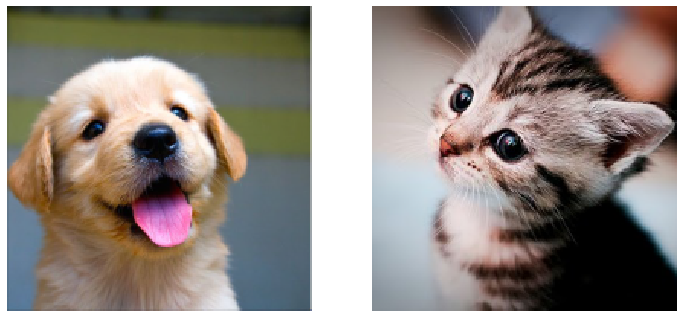

In [52]:
# kitten is wide, and puppy is already square
d = kitten.shape[1] - kitten.shape[0]
kitten_cropped = kitten[:, d//2:-d//2, :]


img_size = 200   # Make this smaller if it runs too slow


X_image = np.zeros((2, img_size, img_size, 3))
X_image[0, :, :, :] = resize(puppy, (img_size, img_size), mode='constant')
X_image[1, :, :, :] = resize(kitten_cropped, (img_size, img_size), mode='constant')

plt.rcParams['figure.figsize'] = (12, 6) # set default size of plots
plt.subplot(1, 2, 1)
imshow_noax(X_image[0, :, :, :])
plt.subplot(1, 2, 2)
imshow_noax(X_image[1, :, :, :])
plt.show()

---
##3 - Filter Container

Set up a convolutional weights holding 4 filters, each 3x3


In [53]:
# filters container
W_image = np.zeros((8, 3, 3, 3))
b_image = np.zeros((8,1))

---
##4 - Grayscale Filter

The first filter converts the image to grayscale. 

Set up the red, green, and blue channels of the filter

In [54]:
# grayscale filter
W_image[0, :, :, 0] = [[0, 0, 0], [0, 0.3, 0], [0, 0, 0]]
W_image[0, :, :, 1] = [[0, 0, 0], [0, 0.6, 0], [0, 0, 0]]
W_image[0, :, :, 2] = [[0, 0, 0], [0, 0.1, 0], [0, 0, 0]]

---
##5 - Blue Edge Detection Filter

Second filter detects horizontal edges in the blue channel.

For Edge Detection filter, we need to add 128 to each output so that nothing is negative. So we create a Vector of biases


In [55]:
# edge detection filter
W_image[1, :, :, 2] = [[1, 2, 1], [0, 0, 0], [-1, -2, -1]]

b_image[1] = 128

---
##6 - Shift Right Filter

The third filter is to shift the image to the right by one pixel.

Here we need three filters to do it, because we need to shift all three channels


In [56]:
# shift right filter
W_image[2, :, :, 0] = [[0, 0, 0], [1, 0, 0], [0, 0, 0]]
W_image[3, :, :, 1] = [[0, 0, 0], [1, 0, 0], [0, 0, 0]]
W_image[4, :, :, 2] = [[0, 0, 0], [1, 0, 0], [0, 0, 0]]

---
##7 - Blur Filter

The last filter is to blur the image

Again, we need three filters to blur all three channels


In [57]:
# blur filter
W_image[5, :, :, 0] = [[1/27, 1/27, 1/27], [1/27, 1/27, 1/27], [1/27, 1/27, 1/27]]
W_image[6, :, :, 1] = [[1/27, 1/27, 1/27], [1/27, 1/27, 1/27], [1/27, 1/27, 1/27]]
W_image[7, :, :, 2] = [[1/27, 1/27, 1/27], [1/27, 1/27, 1/27], [1/27, 1/27, 1/27]]

---
##8 - Process Convolution

Compute the result of convolving each input in **X_image** with each filter in **W_image**, offsetting by **b_image**, and storing the results in $out$.

In [58]:
out = conv2d(X_image, W_image, b_image, S=1, P=1)

---
##9 - View Results
Let's take a look at the convolution results

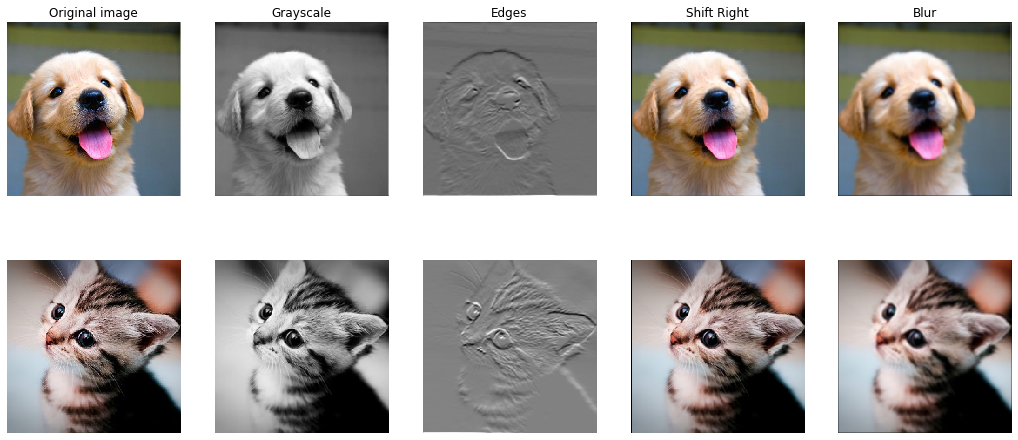

In [59]:
#@title Run This
plt.rcParams['figure.figsize'] = (18, 8) # set default size of plots
# Show the original images and the results of the conv operation

# Puppy
plt.subplot(2, 5, 1)
imshow_noax(puppy, grayscale=False)
plt.title('Original image')

plt.subplot(2, 5, 2)
imshow_noax(out[0, :, :, 0])
plt.title('Grayscale')

plt.subplot(2, 5, 3)
imshow_noax(out[0, :, :, 1])
plt.title('Edges')

plt.subplot(2, 5, 4)
# plt.imshow(out[0, :, :, 2:5])
imshow_noax(out[0, :, :, 2:5], grayscale=False)
# plt.gca().axis('off')
plt.title('Shift Right')

plt.subplot(2, 5, 5)
imshow_noax(out[0, :, :, 5:8], grayscale=False)
# plt.imshow(out[0, :, :, 5:8])
plt.title('Blur')

# Kitten
plt.subplot(2, 5, 6)
imshow_noax(kitten_cropped, grayscale=False)

plt.subplot(2, 5, 7)
imshow_noax(out[1, :, :, 0])

plt.subplot(2, 5, 8)
imshow_noax(out[1, :, :, 1])

plt.subplot(2, 5, 9)
imshow_noax(out[1, :, :, 2:5], grayscale=False)
# plt.imshow(out[1, :, :, 2:5])

plt.subplot(2, 5, 10)
imshow_noax(out[1, :, :, 5:8], grayscale=False)
# plt.imshow(out[1, :, :, 5:8])

plt.show()

**EXPECTED OUTPUT**:

<img src="https://i.ibb.co/cCB51nk/cvresult.png" width="70%">

it might not too clear, but you should see a black line at the left border after the image is shifted one pixel to the right

---
---
# Congratulation, You've Completed Exercise 5

<p>Copyright &copy;  <a href=https://www.linkedin.com/in/andityaarifianto/>2020 - ADF</a> </p>

![footer](https://i.ibb.co/yX0jfMS/footer2020.png)